In [ ]:
import zipfile
import os
zip_path = "/content/drive/MyDrive/Fingerprints.zip"
extract_path = "/content/Fingerprints"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {os.path.abspath(extract_path)}")


Dataset extracted to: /content/Fingerprints


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from collections import defaultdict
from PIL import Image
import os


In [ ]:

# Dataset path
dataset_root = "/content/Fingerprints/dataset"


In [ ]:

# Prepare containers
class_counts = defaultdict(int)
image_shapes = defaultdict(int)



In [ ]:
import os
import matplotlib.pyplot as plt
dataset_dir = "/content/Fingerprints/dataset"
class_counts_dict = {}
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for class_name in sorted(os.listdir(dataset_dir)):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        count = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ])
        class_counts_dict[class_name] = count
total_images = sum(class_counts_dict.values())
print("✅ Total Images in Dataset:", total_images)
print("✅ Image Count per Class:")
for cls, count in class_counts_dict.items():
    print(f"   {cls}: {count}")


✅ Total Images in Dataset: 8000
✅ Image Count per Class:
   A+: 1000
   A-: 1000
   AB+: 1000
   AB-: 1000
   B+: 1000
   B-: 1000
   O+: 1000
   O-: 1000


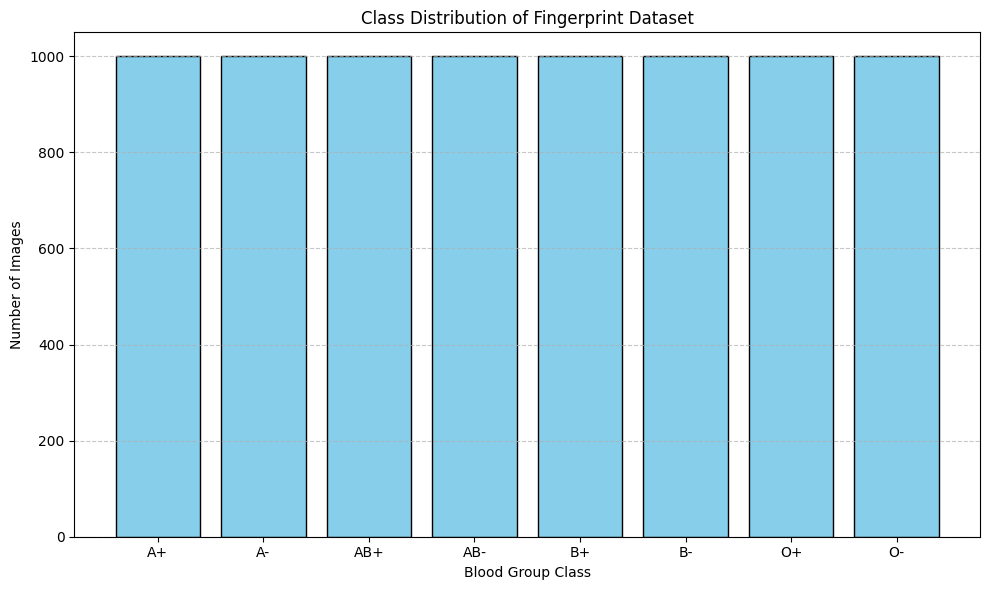

In [ ]:

# Plotting
labels = list(class_counts_dict.keys())
counts = list(class_counts_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Blood Group Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Fingerprint Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image
from collections import Counter
dataset_path = "/content/Fingerprints/dataset"
image_shapes = Counter()
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    for filename in os.listdir(class_dir):
        if filename.lower().endswith(image_extensions):
            img_path = os.path.join(class_dir, filename)
            try:
                with Image.open(img_path) as img:
                    image_shapes[img.size] += 1
            except Exception as e:
                print(f"❌ Could not read {img_path}: {e}")
print("\n🖼️ Image Sizes:\n")
if image_shapes:
    for size, count in image_shapes.items():
        print(f"Size {size[0]}x{size[1]}: {count} images")
else:
    print("No images found or failed to read any image.")



🖼️ Image Sizes:

Size 96x103: 7939 images
Size 241x298: 59 images
Size 103x96: 2 images


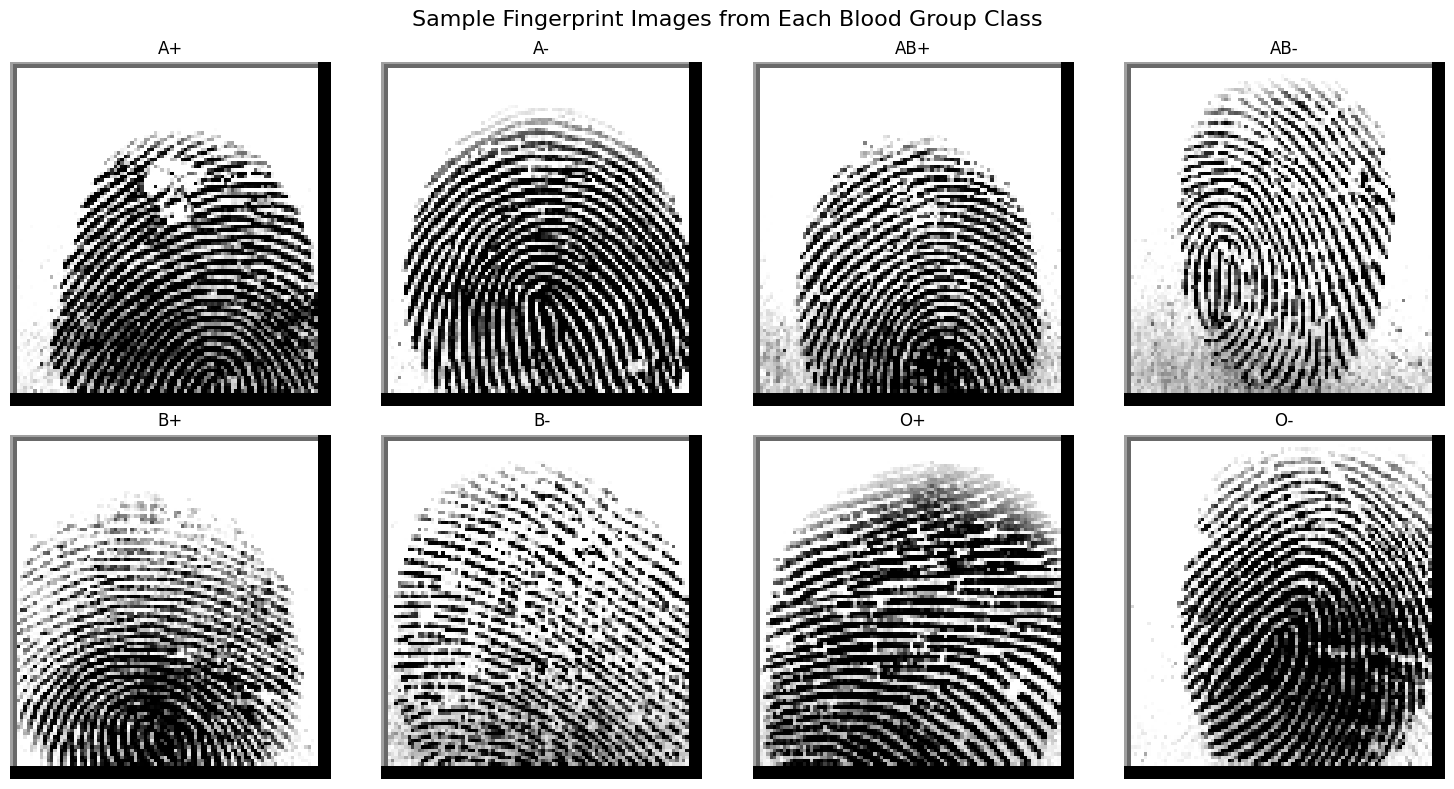

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
dataset_root = "/content/Fingerprints/dataset"
sample_images = []
labels = []

for label_folder in sorted(os.listdir(dataset_root)):
    class_path = os.path.join(dataset_root, label_folder)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.lower().endswith(('.bmp', '.jpg', '.png', '.jpeg')):
                sample_images.append(os.path.join(class_path, file))
                labels.append(label_folder)
                break
plt.figure(figsize=(15, 8))
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path).convert("L")
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

plt.suptitle("Sample Fingerprint Images from Each Blood Group Class", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
original_dataset_dir = "/content/Fingerprints/dataset"
split_dataset_dir = "content/Fingerprints/split_dataset"
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
image_paths = []
labels = []

for class_name in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            if file_name.lower().endswith(image_extensions):
                image_paths.append(os.path.join(class_dir, file_name))
                labels.append(class_name)

# Split dataset: 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    image_paths, labels, test_size=0.15, stratify=labels, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)

def copy_files(image_list, labels_list, split_name):
    for img_path, label in zip(image_list, labels_list):
        dst_dir = os.path.join(split_dataset_dir, split_name, label)
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(img_path, os.path.join(dst_dir, os.path.basename(img_path)))
copy_files(X_train, y_train, 'train')
copy_files(X_val, y_val, 'val')
copy_files(X_test, y_test, 'test')

print("✅ Dataset successfully split into train/val/test with class balance.")


✅ Dataset successfully split into train/val/test with class balance.


In [ ]:
import shutil
split_dataset_dir = "/content/content/Fingerprints/split_dataset"
output_zip_path = "content/Fingerprints_split_dataset.zip"
shutil.make_archive(base_name=output_zip_path.replace(".zip", ""),
                    format='zip',
                    root_dir=split_dataset_dir)

print(f"✅ Zipped dataset created at: {output_zip_path}")


✅ Zipped dataset created at: content/Fingerprints_split_dataset.zip


In [ ]:
import zipfile
import os
zip_path = "/content/content/Fingerprints_split_dataset.zip"
extract_path = "/content/Fingerprints_split_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {os.path.abspath(extract_path)}")


Dataset extracted to: /content/Fingerprints_split_dataset


In [ ]:
import os
base_dir = "/content/Fingerprints_split_dataset"
splits = ['train', 'val', 'test']
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for split in splits:
    split_dir = os.path.join(base_dir, split)
    total_images = 0
    print(f"\n📁 {split.upper()} Set:")

    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len([
                f for f in os.listdir(class_dir)
                if f.lower().endswith(image_extensions)
            ])
            total_images += num_images
            print(f"  🔸 Class {class_name}: {num_images} images")

    print(f"✅ Total images in {split} set: {total_images}")



📁 TRAIN Set:
  🔸 Class O+: 699 images
  🔸 Class A+: 700 images
  🔸 Class AB+: 700 images
  🔸 Class AB-: 700 images
  🔸 Class O-: 700 images
  🔸 Class B+: 700 images
  🔸 Class B-: 700 images
  🔸 Class A-: 700 images
✅ Total images in train set: 5599

📁 VAL Set:
  🔸 Class O+: 151 images
  🔸 Class A+: 150 images
  🔸 Class AB+: 150 images
  🔸 Class AB-: 150 images
  🔸 Class O-: 150 images
  🔸 Class B+: 150 images
  🔸 Class B-: 150 images
  🔸 Class A-: 150 images
✅ Total images in val set: 1201

📁 TEST Set:
  🔸 Class O+: 150 images
  🔸 Class A+: 150 images
  🔸 Class AB+: 150 images
  🔸 Class AB-: 150 images
  🔸 Class O-: 150 images
  🔸 Class B+: 150 images
  🔸 Class B-: 150 images
  🔸 Class A-: 150 images
✅ Total images in test set: 1200


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)

        # Calculate flattened size dynamically
        dummy_input = torch.randn(1, 1, 224, 224)
        x = self.pool(F.relu(self.conv1(dummy_input)))
        x = self.pool(F.relu(self.conv2(x)))
        flattened_size = x.view(x.size(0), -1).size(1)

        self.fc1 = nn.Linear(flattened_size, 128)
        self.fc_bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, num_classes)


    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc_bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# Data augmentation for training
train_transform = transforms.Compose([
    transforms.Grayscale(),  # If your model expects 1 channel; else remove
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# No augmentation for validation and test
val_test_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
data_dir = "/content/Fingerprints_split_dataset"
batch_size = 32

train_data = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=train_transform)
val_data   = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=val_test_transform)
test_data  = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=val_test_transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=batch_size, shuffle=False)

num_classes = len(train_data.classes)

In [ ]:
import torch
import time
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

model = SimpleCNN(num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 40
best_val_loss = float('inf')

# Lists to store metrics
train_acc_list = []
val_acc_list = []
train_loss_list = []
val_loss_list = []

for epoch in range(epochs):
    start_time = time.time()
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    # --- Training Phase ---
    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

    train_loss = running_loss / total
    train_acc = correct / total

    # --- Validation Phase ---
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, val_preds = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (val_preds == labels).sum().item()

    val_loss /= val_total
    val_acc = val_correct / val_total

    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)

    elapsed_time = time.time() - start_time
    step_time = elapsed_time / len(train_loader)

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"{len(train_loader)}/{len(train_loader)} ━━━━━━━━━━━━━━━━━━━━━ "
          f"{int(elapsed_time)}s {int(step_time * 1000)}ms/step - "
          f"accuracy: {train_acc:.4f} - loss: {train_loss:.4f} - "
          f"val_accuracy: {val_acc:.4f} - val_loss: {val_loss:.4f}")

Epoch 1/40
175/175 ━━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.4512 - loss: 1.4097 - val_accuracy: 0.6878 - val_loss: 0.9103
Epoch 2/40
175/175 ━━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.6612 - loss: 0.9723 - val_accuracy: 0.7660 - val_loss: 0.7072
Epoch 3/40
175/175 ━━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.7258 - loss: 0.7813 - val_accuracy: 0.7702 - val_loss: 0.6543
Epoch 4/40
175/175 ━━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.7482 - loss: 0.6880 - val_accuracy: 0.7777 - val_loss: 0.5513
Epoch 5/40
175/175 ━━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 0.7630 - loss: 0.6460 - val_accuracy: 0.7968 - val_loss: 0.5459
Epoch 6/40
175/175 ━━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - accuracy: 0.7826 - loss: 0.6011 - val_accuracy: 0.7843 - val_loss: 0.5289
Epoch 7/40
175/175 ━━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.7857 - loss: 0.5788 - val_accuracy: 0.8401 - val_loss: 0.4150
Epoch 8/40
175/175 ━━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 0.7985 -

In [ ]:
model.eval()
test_correct, test_total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (preds == labels).sum().item()
print(f"Test Accuracy: {100 * test_correct / test_total:.2f}%")


Test Accuracy: 89.25%


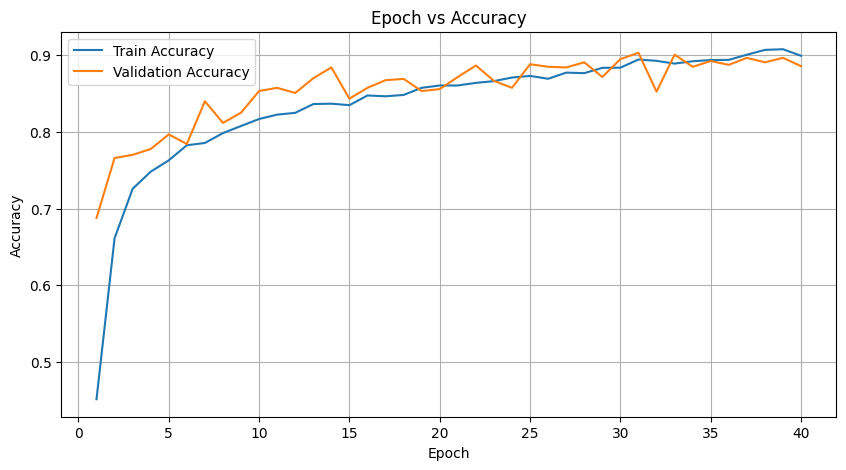

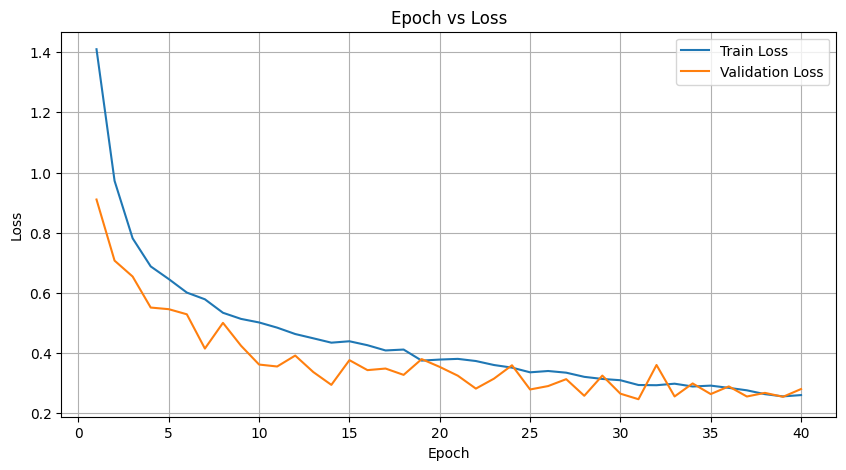

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(train_acc_list) + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_acc_list, label='Train Accuracy')
plt.plot(epochs_range, val_acc_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, train_loss_list, label='Train Loss')
plt.plot(epochs_range, val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 800x600 with 0 Axes>

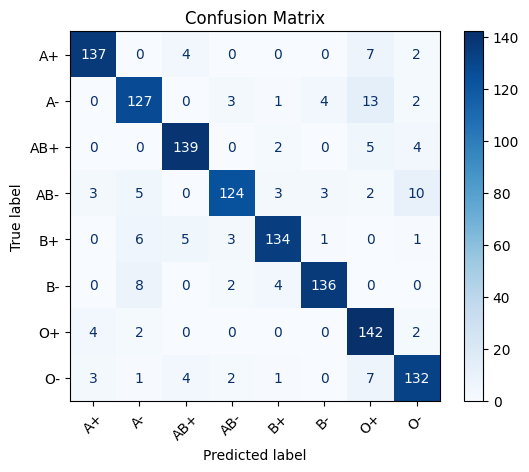

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the same transform used during training
transform = transforms.Compose([
    transforms.Grayscale(),  # Add this to convert to 1 channel
    transforms.Resize((224, 224)),  # Adjust size based on your model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Adjust if RGB images
])

# Load test dataset from path
test_dir = "/content/Fingerprints_split_dataset/test"
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Get class names
class_names = test_dataset.classes
print("Classes:", class_names)

Classes: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [ ]:
model.eval()

for idx, (image, label) in enumerate(test_loader):
    image = image.to(device)
    label = label.to(device)

    with torch.no_grad():
        output = model(image)
        _, pred = torch.max(output, 1)

    actual_label = class_names[label.item()]
    predicted_label = class_names[pred.item()]

    print(f"[{idx+1}] Actual: {actual_label}, Predicted: {predicted_label}")


[1] Actual: A+, Predicted: A+
[2] Actual: A+, Predicted: O+
[3] Actual: A+, Predicted: A+
[4] Actual: A+, Predicted: O+
[5] Actual: A+, Predicted: A+
[6] Actual: A+, Predicted: A+
[7] Actual: A+, Predicted: A+
[8] Actual: A+, Predicted: A+
[9] Actual: A+, Predicted: A+
[10] Actual: A+, Predicted: A+
[11] Actual: A+, Predicted: A+
[12] Actual: A+, Predicted: A+
[13] Actual: A+, Predicted: A+
[14] Actual: A+, Predicted: A+
[15] Actual: A+, Predicted: A+
[16] Actual: A+, Predicted: A+
[17] Actual: A+, Predicted: A+
[18] Actual: A+, Predicted: A+
[19] Actual: A+, Predicted: A+
[20] Actual: A+, Predicted: A+
[21] Actual: A+, Predicted: A+
[22] Actual: A+, Predicted: A+
[23] Actual: A+, Predicted: A+
[24] Actual: A+, Predicted: O-
[25] Actual: A+, Predicted: A+
[26] Actual: A+, Predicted: A+
[27] Actual: A+, Predicted: A+
[28] Actual: A+, Predicted: O+
[29] Actual: A+, Predicted: A+
[30] Actual: A+, Predicted: A+
[31] Actual: A+, Predicted: A+
[32] Actual: A+, Predicted: A+
[33] Actual: A+, 

In [ ]:
correct_count = 0
wrong_count = 0

model.eval()
with torch.no_grad():
    for idx, (image, label) in enumerate(test_loader):
        image = image.to(device)
        label = label.to(device)

        output = model(image)
        _, pred = torch.max(output, 1)
        if pred == label:
            correct_count += 1
        else:
            wrong_count += 1
total_images = correct_count + wrong_count
print(f"Total Test Images: {total_images}")
print(f"Correct Predictions: {correct_count}")
print(f"Wrong Predictions: {wrong_count}")
print(f"Accuracy: {(correct_count / total_images) * 100:.2f}%")


Total Test Images: 1200
Correct Predictions: 1071
Wrong Predictions: 129
Accuracy: 89.25%
